# Intro
The thirteenth lesson of fast.ai.

# Lesson Overview

# Lecture Notes

03_backprop

...
we load in mnist data as tensors

start by creating the basic architecture for a neural net.

reviewing what a basic net is and why:

start by considering a linear model of a single pixel from an mnist picture
y value is likelihood of a classification of being a digit '3'. X is the pixel. The brighter the pixel is, the higher likelihood of being 3. a linear model is a straight line, which isnt very useful. it cant add additional lines, because it will just result in another line. instead to create a curve, we create a line RElu line! Everything to the left of the RELU point is left alone and everything to the right is changed. we can just keep adding more RELUs in order to change the curvature. eventually creating any curve we want!

In reality, we dont have one pixel to classify, but many. Multidimensional spaces. We create complex 3d curves by adding RElu curves.

Ahead of time we decide how many these RElu lines to add, e.g. 10. to add them, we need martix multi.

Mnist:
50000 rows by 784 columns.
To add nodes: multi by 784 rows and 10 columns.
Each row in 50000 is one image's pixels. 
Our output is 50000 by 10. 
Each row on the output is for an image. The first element is the probability of being '1', the second '2', etc.
Not sure if the second matrix has 10 columns one for each classifcaiton or one for each node?

In reality, for 50 hidden nodes:
50000x784 input multi by 784x50 to create 50 hidden layers, then trucated at 0, then 50x10 to create 10 outputs.
The previous process is done in these two matrix mult steps.






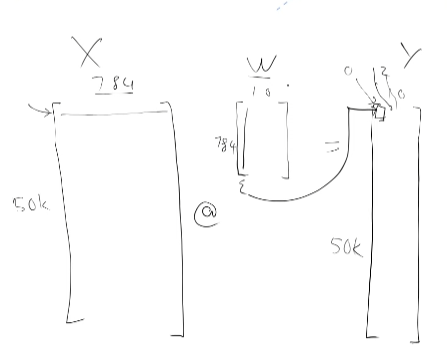

W starts with random values.
w is 50000x50 random values
and we add biases, start them at 0. one for each output so 50 of them.
w2 is layer two, 50 hidden layers, and 10 classifcation digits, so 50x10. But we're not going to do cross entropy classifcation yet, we'll use MSE isntead, so only one output, so 50x1. 
The one output is just what number to we tink it is. We don't give 10 probabilities by one value of what the model think it is. We compare these to the real labels using MSE.
This is stupid because it says 9 is further away from 2 on correctness but that's dumb. (I guess 8 and 9 are less wrong?).

x_valid is 10000x784
through weights and baises 10000x50 hidden activations/layers
now through RElu, anything under 0 is 0.

an NLP is just first linear layer (w1,b1), then relu, then second linear layer (w2,b2).

and we get 10000x1 back, because thats prediction of a digit for each of the 10000 entries.

res is 10000
res-y_valid gives 10000x10000!
why? because we start at the last dim and go R to L. 
10000 and 1 is compatable, so that 1 will be braodcast along the 10000 values, giving 10000 values.

more to the left, there is nothing, so it inserts a 1, which makes 1 and 10000 compatable, so is broadcast among the 10000 and we get with with another 100000

we simply need to add a unit axis ourselves to the right to fix this!
or just remove the 1 from 10000x1, 
.squeeze removes all unit dimensions.
now we can get 10000 values as we want.

turn y_valid etc into floats since we're suing MSE.

mse subtracts, ** 2 and gets the mean, now we have a loss function!

Now we need gradients.

Gradients are slopes.
Consider a neural network. It contains a matrix of inputs, and a matrix of weights, then puts the result into a loss function, which we cmpare to the actual.


![image.png](attachment:image.png)


The derivartive of the loss w.r.t one parameter in the weights tells us what direction (in opposite direction) to go to imporve loss. SGD is going in this direction in a small amount (with a learning rate), many times.

For 2D x,y dimensions case, where z is the output.
the derivative is two values
![image-2.png](attachment:image-2.png)

What if we're in the first layer, where we get 784 inputs to the function and 50 outputs? Changing one input will affect all 50 outputs, and all 50 outputs depend on all 784 inputs? How do we express this mathematically?
We get a matrix!
![image-3.png](attachment:image-3.png)
In this case, there are 784 inputs so 784 rows, and each column represents on a row how changing that specific input affects a particular output.
Each element is a derivative.
Eventually we end up with the loss being a singule number, but we need to manipulate this matrix into one.

This matrix of all the derivatives is called the jacobian. There's a resource linked by Jeremy for this which might help with understanding papers.

sympy to do symbols nicely!

Why we care about chain rule?
Because we want MSE gradient w.r.t the model.



Our steps are loss function between prediction and actuals. 
l2 is the second layer
the second layer is a function of relu activations (using w2 and b2)
the relu act are functions of the first layer l1
and l1 is a function of the inputs using (w1 and b1).

We want the loss function derivative and need to go downwards! This is all backpropagation. It heavily uses the chain rule.

![image-4.png](attachment:image-4.png)


forward pass calculates the loss.
(loss = res.pow ... should be diff.pow...)
the loss is the outputput-target squared etc

backwards pass
we store the graidents of each later, in the layer itself.
out.g does so
is 2 * diff and diff squared, and divide by inp shape is meme
gradient of a linear layer, we need the gradients of the outputs to find it because of the chain rule.

for w.g., we got the input weights, multi them by the outputs?

we need a better way to explore what things are doing since its hard to do it cell by cell.
we use a debugger, pbd to do so, it tells debugger to stop exe code at that line, it creates a break point.

python debugger is SUPER important to understand.
you should look up at python pdb tutotial


print is p in it.
p inp.shape

we can ignore the p if the variable name isn't one of the debugger commands.

unseuzeze (-1) adds an axis to the end?

each image inivudally contributes to the dervitaitve so we want to add them al lup. the derviatve of a sum of functions is the same of the dervtiatve of the sum of the dertative of the functions. so we do that!

this is a good use case for einsum

c to continue to the next line, we go back to lin grad because its called again. 

w tells us "where am i?" how did we get to this break line?
n goes to the right line

c for continue to the end?

x_train.zero_() sets it all to zero for us so we can rerunthings.

we realise with debug that an einsum can do this.
rewatch this part carefully


we can replace some of the code with a matrix multiply!

dont worry about how pytorch does deritavies, we'll do it ourselves later.

create a class for each function.

dunder call __call__ creates a class like a function 

the backward pass is interesting because it needs to know some intermedaite calcualtes because of the chain rule.

this is why class relu stores its output and its input, so when we do backward, it can wor, backward uses the chain rule.

class lin 
cals input and outputs and stores it.

for mse as calculate it and store i

Model calss stores instances of classess
call each layer, store x as the result, 

whats interesting about this is that we dont have two seperate functions instead of model like a loss func applied to a neural net, we're calculated the loss inside the model. it's not better or worse. 

fast.ai usually loss as a sperate function, huggingface often combines them.

backward in model stores the inputs outputs etc to calculate it

now we can calculate the model and the loss, and check that each of the gradients we stored earlier are equal to each of our new gradients

Now every class can be separately considered. 

As a rule of thump, when we see repeated code, like in our three classes, we can reduce it.

We use Module to reduce this repeated code from the three classes. 

Forward doesnt do anything. The point of Module is to be inejeribed. All our backwards wanted self.out, so we def backwards to contain it. * means take all the arguments, and put them into a list. If you call an function with a * it means take this list and expand them into seprate arguments, calling backwards with each of them indivudally.

The old Relu class had to store things manually, the new relu just inhierited module and it's forward and backwards functions just do whay we want them to.

There's often opptunrities to manually speed things up. in Mse, inp.suqece()-targ .. is done twice. at memory cost, we can see this calculation as a new variable, diff, as self.diff, and remove the redundant calculation and just use it directly. 

We can do this often in neural nets. A comprise behind losing memory for less computation.

Thankfully Pytorch has written classes for us which now we've written we can use. They're called nn.X. So we create our classes inheiriting from nn.Module. 

we need to define forwards, but dont need to define backwards becuase pytorch knows deriviates of functions and the chain rule. 

we previously stored our gradients in .g, but pytorch its .grad

We're now upto the point wher we can train a model!
new notebook!

Firstly lets improve our loss function since MSE was awful. In part 1, there's an extropy example excel file.

For MSE, we simply output the most likely (highest probabilitiy) digit the model predicts from an image. 

For cross entropy, we instead output 10 numbers for each image. Thats the probability that the image is '1','2'...'10'. 

The y matrix (containing the correct labels) are now instead one-hot-encoded rows of each label.

E.g. y^ = '0.99,0,0,0,0.01..'
y = '1,0,0,0..'
gives low cross entropy loss!

We dont even need to one-hot-encode the y matrix. instead we can just directly store the target digit as an interger and use it as if it was one-hot-encoded.

For softmax:
say we have 5 categories to predict. 
The network gets an image to predict.
it outputs 5 values, these would be probabilities in the previous example but here they are not.
Then we raise each value to e, and sum them
Then we divide each value by the sum. This gives us our softmaxes. We will get 5 of them.
Softmaxes are probability predictions. They add up to one.

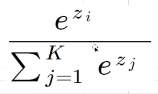

z1 is output 1, z2 is output 2 etc (i=1, i=2).
K = 5. 

Now we have our 5 softmaxes.

For the loss func, we compare those softmaxes (probability) to the one hot encoded label. 
we calculate x-entropy for each softmax. It's log(softmax) * actual. Actual is either 0 or 1.
Because only one actual is 0, only one x-entropy is non zero, so the sum of x-entropies is just that one x-entropy.

In this special case where the actuals are one-hot-encoded: 
Doing actuals * log(softmax) is identicle to simply indexing into a category row and looking at its softmax.

This is review. Go back to part 1 for more detail.

Back to the notebook.

In cross-entropy we dont want softmax but log(softmax). 
When def logmax, we want to leave a unit axis to avoid the other broadcasting issue we got earlier.

log_softmax(pred)

Key maths to know is log and exponent rules. THey come into neural nets all the time.

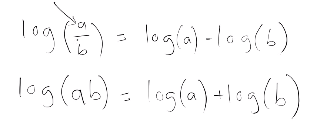
We need them because plus and minuses are a lot faster than devisions or multiplication computationally. 

We have a division being logged, and exp and log are opposites. So we simplify.

Another cool trick: 
log of a sum.

x.exp() is a big number, there's not much precision of big numbers, this leads to derivatives being inaccurate. 
So what we do is calculate the max of x, so call it A.

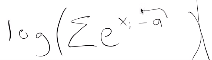

So rather than doing log(sum(e*x)), instead define a as max of all x values. If we then subtract a from all the x values, then none of the values are big. This would give us a different result.

So we get e^x1-a, e^x2-a, e^x3-a.
This is e^x1/e^a, e^x2/e^a, e^x3/e^a,
1/e^a(e^x1+e^x2+e^x3)
Now multiply it by e^a, so 
e^a(log(sum(e*x))) = log(sum(e*x))
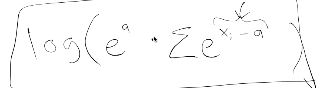!

Then we can turn the e multiplication into a log sum.

This trick is called the logsumexp.

Now we rewrite log_softmax using pytorch's version of it.

Our outputs are not one-hot-encoded, they are just interger indices, so we can write cross entropy simply as -log(p)

How do we do this in Pytorch?
5 0 and 4 are the first 3 labels/y values.
the 1st prediction is in the 0th row, and the y value is 5, so it's [0,5]
2nd pred in 2nd row, y val is 0, so it's [1,0]

If we index using two lists, [0,1,2] and [:3], it returns the same thing! 

Both give us what we need for cross entropy loss.
So we take range and target, - mean gives us cross entropy loss.

Pytroch calls this negative log likelihood loss. If we take it and pass it to log softmax, then we get the loss. This combination is called F.cross_entropy.

There's a lot of confusing things going on here.
HW: implement F.log_softmax, F.nll_loss, F.cross_entropy and compare it to Pytorch's values.

Now we can finally create a training loop.
We get 64x10, 64 images each with 10 predictions.

For each of our predictions, for each row, we see what the highest number is. For 0th, it's 0.10, which is the 3th index. The function to find the index of the highest number per row is argmax. preds.argmax

We don't need this for loss, but accuracy.
random weights no training give 0.09 accuracy.
To understand the training cell, break it all up and put it together again.

gradients of weights and biases _ means do it in place. it sets to 0.

we run, and see accuracy improve from 0.09 to 0.96 on training set after 3 epochs!

HW:
Key basics pieces are in place.
Recreate without peaking as much as possible. Matrix multiply, forward and backwards passes, steps through passes, .forward and .backwards.
At the very least, pick out some piece, or look through these notebooks very carefully. 

# Links
- As I am doing this course as it is released privately live, I cannot share links to the lesson.